In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder# to normalize label
from sklearn.model_selection import train_test_split# Training and testing the data set 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score# Testing the data

In [35]:
d=pd.read_csv("C:/Users/jijom/Downloads/sales_data_sample (1).csv",encoding='Latin-1')

In [36]:
d.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [37]:
d.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [38]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [39]:
d.shape

(2823, 25)

In [40]:
d.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [41]:
d.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [42]:
d.value_counts()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  SALES    ORDERDATE        STATUS      QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE       MSRP  PRODUCTCODE  CUSTOMERNAME                PHONE            ADDRESSLINE1                             ADDRESSLINE2  CITY          STATE     POSTALCODE  COUNTRY    TERRITORY  CONTACTLASTNAME  CONTACTFIRSTNAME  DEALSIZE
10120        22               100.00     6                2461.36  4/29/2003 0:00   Shipped     2       4         2003     Motorcycles       99    S32_1374     Australian Collectors, Co.  03 9520 4555     636 St Kilda Road                        Level 3       Melbourne     Victoria  3004        Australia  APAC       Ferguson         Peter             Small       1
10361        34               100.00     6                3871.92  12/17/2004 0:00  Shipped     4       12        2004     Vintage Cars      65    S24_3420     Souveniers And Things Co.   +61 2 9495 8555  Monitor Money Building, 815 Pacific Hwy  Level 6       Chatswood  

In [43]:
d.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

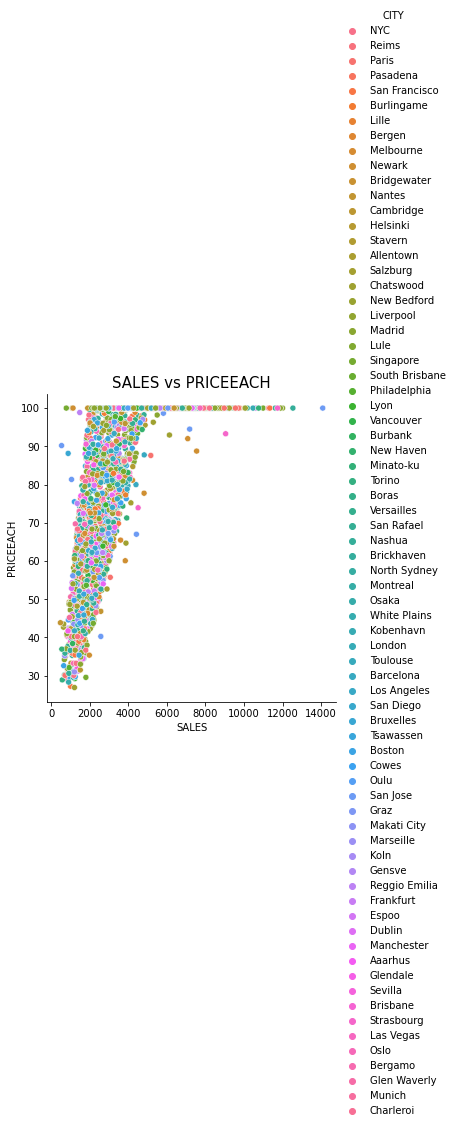

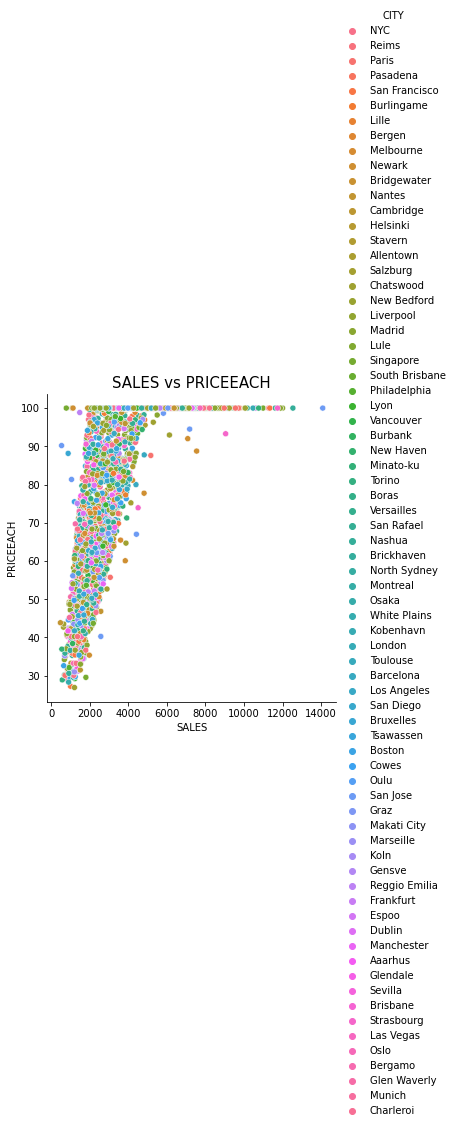

In [44]:
a=sns.relplot(x='SALES', y= 'PRICEEACH',hue='CITY', data=d)
plt.title("SALES vs PRICEEACH",fontsize=15)

a.fig

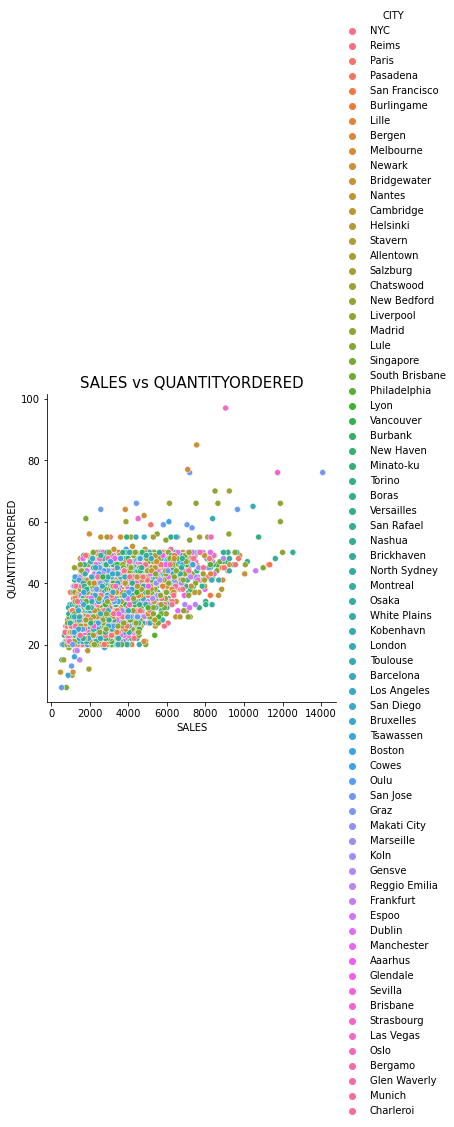

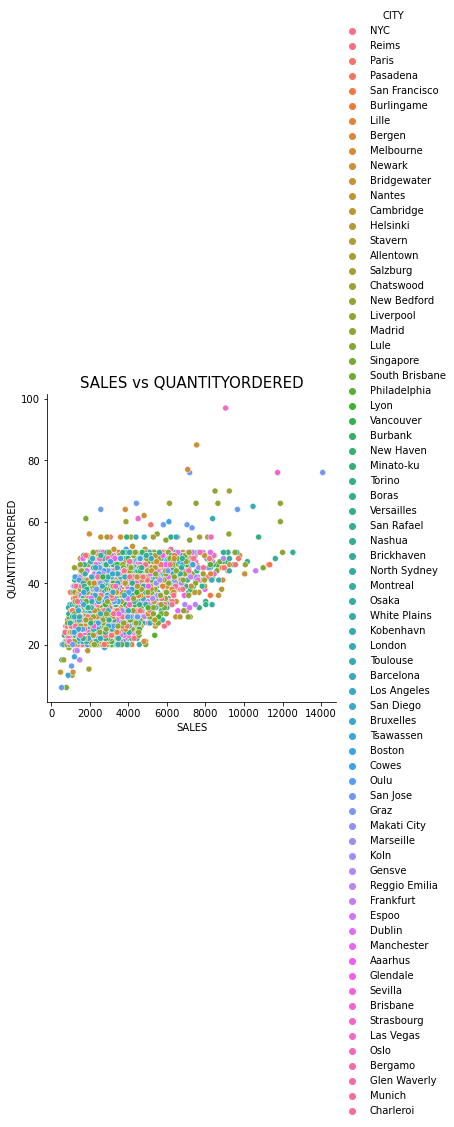

In [45]:
b=sns.relplot(x="SALES", y = 'QUANTITYORDERED',hue='CITY',data= d)
plt.title("SALES vs QUANTITYORDERED",fontsize=15)

b.fig

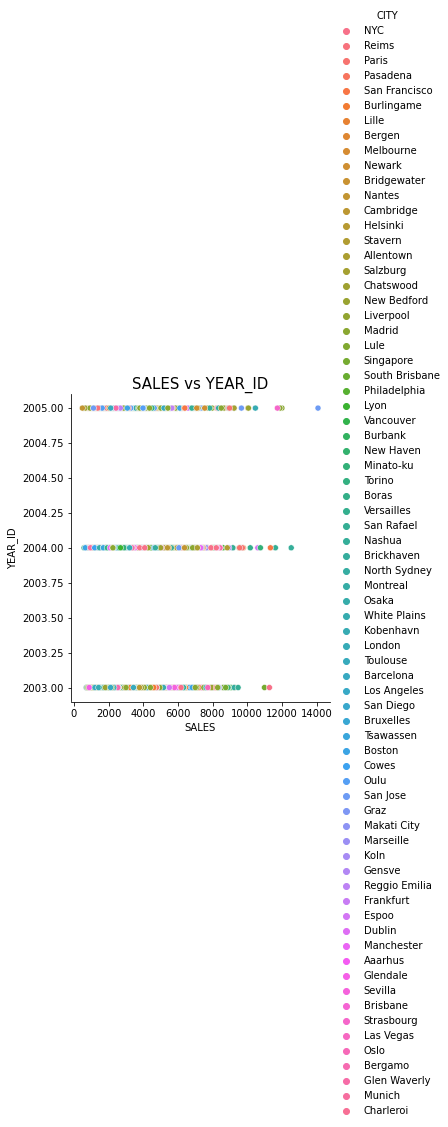

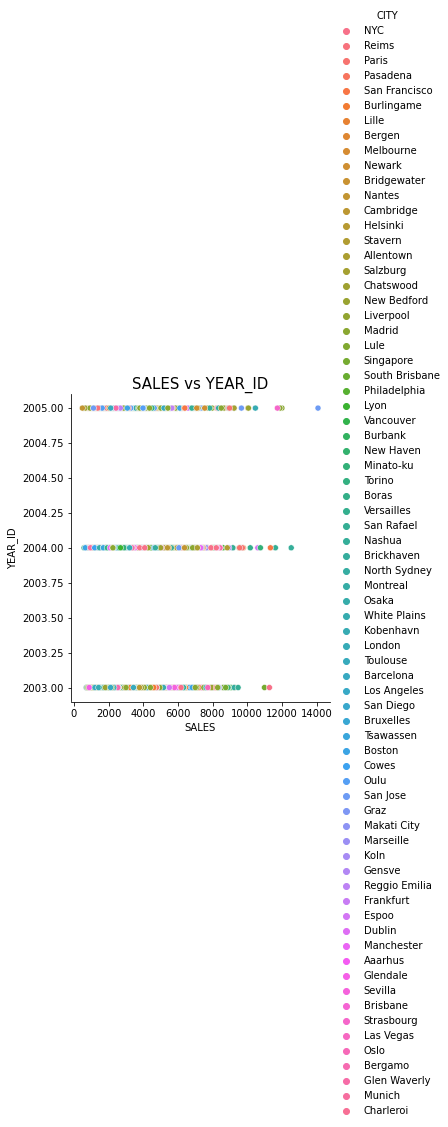

In [46]:
c=sns.relplot(x="SALES", y="YEAR_ID",hue='CITY', data=d)
plt.title("SALES vs YEAR_ID",fontsize=15)
c.fig

In [47]:
list_1=list(d.columns)#lets find the categorialfeatures
list_1

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [48]:
list_cate=[]
for i in list_1:
    if d[i].dtype=='object':
        list_cate.append(i)
list_cate

['ORDERDATE',
 'STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [51]:
le=LabelEncoder()

In [52]:
for i in list_cate:
    d[i]=le.fit_transform(d[i])

In [53]:
y=d['STATE']
x=d.drop('STATE',axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [55]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

2258
565
2258
565


In [56]:
#DECISION TREE CLASSIFIER
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [57]:
y_pred=dtree.predict(x_test)
y_pred

array([16,  9, 16, 16, 16, 16,  2, 16, 16, 15, 16, 11, 16,  7,  4, 16, 16,
       10, 16,  1, 16,  3,  9, 16, 16, 11,  9,  1, 16, 16,  1,  9, 16,  5,
       15,  1, 16, 16,  1, 16, 16, 11, 16,  4,  1,  1, 16,  2, 16, 16,  9,
       16,  4, 16, 14, 10, 16,  3, 16, 16, 16, 16, 16,  1,  1, 10, 16, 16,
       16, 16, 16,  1,  1,  8, 16,  4, 16, 16,  9, 10,  4, 16,  9, 16,  1,
       16, 16,  9, 16, 16,  1, 16,  7,  4,  4, 16,  4,  1, 16, 16, 16, 16,
       16, 16,  7, 16, 16,  1, 16, 16,  1, 14,  1,  1, 16, 16,  7, 16, 12,
        4,  3,  9,  2,  9, 16, 16,  4, 16,  3,  1, 16, 16, 16,  4, 16, 16,
       11, 12, 16,  3, 16,  9,  0,  1, 16,  4, 16, 16,  2, 16, 16,  9, 16,
       16, 16,  7, 16, 16, 16,  1, 16, 16, 16,  3, 16, 16,  1,  1,  8, 16,
        6, 16, 16, 16,  5, 16, 12,  9, 16,  4,  1,  6, 16, 16, 11, 16,  1,
       16, 16, 16, 16,  1, 11, 16,  7,  1,  9, 16,  9, 16,  1, 16,  4, 15,
       16, 16,  9,  6, 16,  1, 16, 16, 16, 16, 16, 16,  5, 16,  1, 14, 16,
        4, 16, 16, 16, 13

In [58]:
print("Accuracy is"),accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 100.0)